In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
from data_reader_writer import data_writer

import pypsa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 22})

## System Transformation - 2045

In [9]:
# scenario = 'Leading The Way'
# scenario = 'Consumer Transformation'
scenario = 'System Transformation'
# scenario = 'Steady Progression'
year = 2045
year_baseline = 2012

start = str(year) + '-12-04 20:00:00'
end = str(year) + '-12-10 20:00:00'
# time step as fraction of hour
time_step = 1
data_writer(start, end, time_step, year, demand_dataset='eload', year_baseline=year_baseline,
            scenario=scenario, FES=2022, merge_generators=True, scale_to_peak=True)

c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\arrays\datetimes.py:741: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  warnings.warn(
c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\core\indexing.py:1667: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = value
C:\Users\alyden\OneDrive - University of Edinburgh\Python\PyPSA-GB v0.0.1\PyPSA-GB\interconnectors.py:206: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_FES = df_FES[~df_FES.Variable.str.contains('(TWh)')]


In [10]:
network = pypsa.Network()
network.import_from_csv_folder('LOPF_data')

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version None.

INFO:pypsa.components:Applying weightings to all columns of `snapshot_weightings`
       'Tidal lagoon S.W.Penisula', 'Tidal stream Deeside',
       'Tidal stream Lovedean', 'Tidal stream Melksham',
       'Tidal stream Penwortham', 'Tidal stream S.W.Penisula',
       'Wave power Beauly', 'Wave power Melksham', 'Wave power Neilston'],
      dtype='object', name='Generator') for attribute p_max_pu of Generator are not in main components dataframe generators
INFO:pypsa.io:Imported network LOPF_data has buses, generators, lines, links, loads, storage_units


In [11]:
# scale the B6 lines to system transformation economy RT
B6 = network.lines.at['17', 's_nom'] + network.lines.at['18', 's_nom'] + network.lines.at['23', 's_nom'] + network.lines.at['24', 's_nom'] + network.lines.at['16', 's_nom']
# network.lines
scaling_factor = 24666 / B6
network.lines.s_nom *= scaling_factor

In [13]:
# derate interconnectors to 0% of capacity in Scotland
buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
for bus in buses_scotland:
    network.links.loc[network.links['bus1'] == bus, "p_nom"] *= 0
network.links

,bus0,bus1,carrier,p_nom,marginal_cost,p_min_pu,type,efficiency,build_year,lifetime,...,p_nom_min,p_nom_max,p_set,p_max_pu,capital_cost,length,terrain_factor,ramp_limit_up,ramp_limit_down,p_nom_opt
Link,,,,,,,,,,,,,,,,,,,,,
BritNed,Netherlands,Kemsley,DC,990.0,20.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
EastWest,Ireland,Deeside,DC,594.0,7.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
Moyle,N. Ireland,Neilston,DC,0.0,7.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
Nemo,Belgium,Sellindge,DC,990.0,20.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
IFA,France1,Sellindge,DC,1980.0,15.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
IFA2,France2,Lovedean,DC,990.0,15.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
NSL,Norway,Stella West,DC,1386.0,1.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
ElecLink,France1,Sellindge,DC,990.0,15.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0
Viking Link,Denmark,Walpole,DC,1386.0,7.0,-1.0,,1.0,0,inf,...,0.0,inf,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0


In [14]:
network.lopf(network.snapshots, solver_name="gurobi", pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 1.32s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-19
Read LP format model from file C:\Users\alyden\AppData\Local\Temp\pypsa-problem-bsngsfhq.lp
Reading time = 0.66 seconds
obj: 388469 rows, 118031 columns, 685062 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 388469 rows, 118031 columns and 685062 nonzeros
Model fingerprint: 0x76702f5f
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+09]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-05, 1e+09]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 367595 rows and 51605 columns
Presolve time: 0.27s
Presolved: 20874 rows, 67290 columns, 132147 nonzeros

Ordering time: 0.15s

Barrier statistics:
 AA' NZ     : 6.311e+04
 Factor NZ  : 9.811e+05 (roughly 40 MB of memory)
 Factor Ops : 1.198e+08 (less

INFO:pypsa.linopf:Optimization successful. Objective value: 3.95e+07


('ok', 'optimal')

In [15]:
p_by_carrier = network.generators_t.p.groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier = network.storage_units_t.p.groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier[storage_by_carrier < 0] = 0

p_by_carrier = pd.concat([p_by_carrier, storage_by_carrier], axis=1)

# group biomass stuff
p_by_carrier['Biomass'] = (
    p_by_carrier['Biomass (dedicated)'] + p_by_carrier['Biomass (co-firing)'])

# rename the hydro bit
p_by_carrier = p_by_carrier.rename(
    columns={'Large Hydro': 'Hydro'})

p_by_carrier

carrier,Biomass (co-firing),Biomass (dedicated),CCS Biomass,CCS Gas,Coal,Hydrogen,Hydro,Natural Gas,Nuclear,Oil,...,Unmet Load,Waste,Wave power,Wind Offshore,Wind Onshore,Battery,Compressed Air,Liquid Air,Pumped Storage Hydroelectric,Biomass
snapshot,,,,,,,,,,,,,,,,,,,,,
2045-12-04 20:00:00,163.812,6993.244699,0.0,0.0,0.0,6441.185251,214.905035,0.0,9433.060000,0.0,...,0.0,0.0,6.03200,20738.652055,4416.614206,7744.310079,2408.803849,1134.978285,3300.224324,7157.056699
2045-12-04 21:00:00,163.812,6993.244699,0.0,0.0,0.0,6441.185251,162.331700,0.0,9433.060000,0.0,...,0.0,0.0,2.70686,20576.788845,4084.653755,4137.877858,1704.618427,670.842575,3300.224324,7157.056699
2045-12-04 22:00:00,163.812,6993.244699,0.0,0.0,0.0,3389.595907,63.685826,0.0,9433.060000,0.0,...,0.0,0.0,2.70686,19751.584856,4072.059971,4405.760266,1935.913152,848.112114,2684.124671,7157.056699
2045-12-04 23:00:00,163.812,6993.244699,0.0,0.0,0.0,3478.925897,62.510811,0.0,9433.060000,0.0,...,0.0,0.0,2.70686,17030.246736,4380.045246,2664.249963,2008.624609,1131.847334,3300.224324,7157.056699
2045-12-05 00:00:00,163.812,6993.244699,0.0,0.0,0.0,3389.595907,35.720464,0.0,9433.060000,0.0,...,0.0,0.0,2.86114,15764.985699,4482.838267,3398.263159,2608.890450,807.858150,2889.491222,7157.056699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045-12-10 16:00:00,163.812,7578.408523,0.0,0.0,0.0,459.358546,271.475173,0.0,8408.313559,0.0,...,0.0,0.0,5.72286,36569.659654,3293.403636,495.327679,1318.004643,140.343495,2558.108095,7742.220523
2045-12-10 17:00:00,163.812,7578.408523,0.0,0.0,0.0,459.358546,438.111122,0.0,8795.973558,0.0,...,0.0,0.0,5.72286,37756.671285,3321.932785,756.573575,2090.830348,824.413555,2680.533974,7742.220523
2045-12-10 18:00:00,163.812,7578.408523,0.0,0.0,0.0,459.358546,545.102469,0.0,8927.609960,0.0,...,0.0,0.0,5.72286,35385.704536,3308.767755,4637.532688,1890.743747,1215.392476,3167.621568,7742.220523


Text(0.5, 0, '')

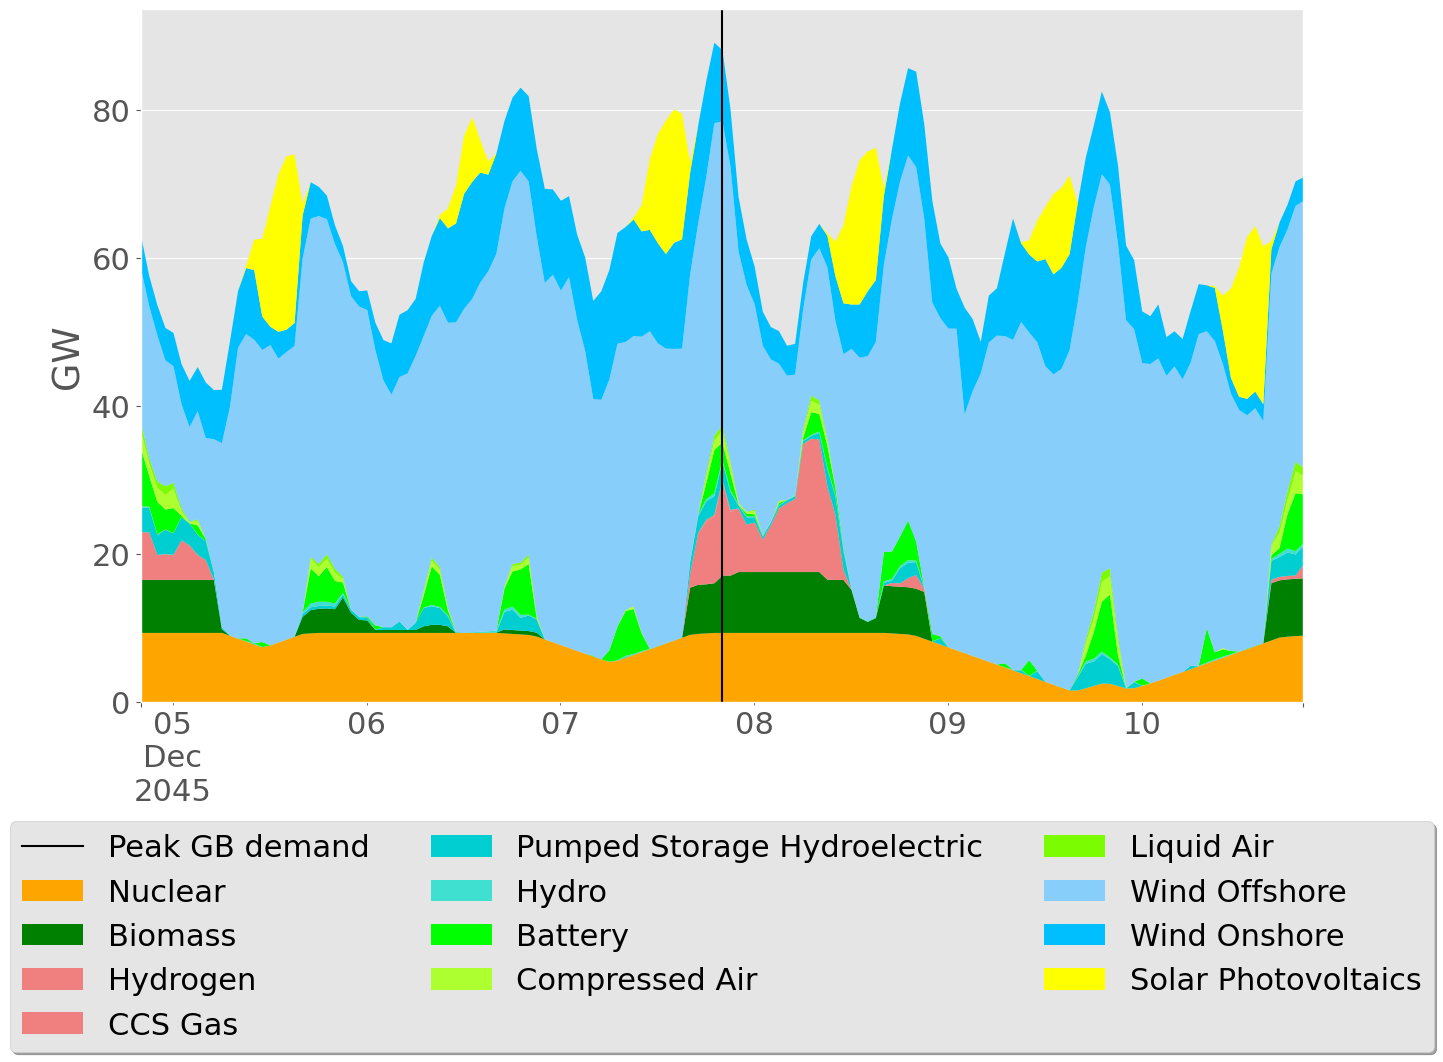

In [16]:
cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Unmet Load'
        ]

p_by_carrier = p_by_carrier[cols]

p_by_carrier.drop(
    (p_by_carrier.max()[p_by_carrier.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier.columns])

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.axvline(x = '2045-12-07 20:00:00', color = 'black', label = 'Peak GB demand')
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)

ax.set_ylabel("GW")

ax.set_xlabel("")

In [17]:

buses_scotland = ['Beauly', 'Peterhead', 'Errochty', 'Denny/Bonnybridge', 'Neilston', 'Strathaven', 'Torness', 'Eccles']
df_generators_scotland = network.generators[network.generators.bus.isin(buses_scotland)]
df_storage_scotland = network.storage_units[network.storage_units.bus.isin(buses_scotland)]

p_by_carrier_scotland = network.generators_t.p[df_generators_scotland.index.values].groupby(
    network.generators.carrier, axis=1).sum()

storage_by_carrier_scotland = network.storage_units_t.p[df_storage_scotland.index.values].groupby(
    network.storage_units.carrier, axis=1).sum()

# to show on graph set the negative storage values to zero
storage_by_carrier_scotland[storage_by_carrier_scotland < 0] = 0

p_by_carrier_scotland = pd.concat([p_by_carrier_scotland, storage_by_carrier_scotland], axis=1)

In [18]:
network.lines_t.p0[['17', '18', '23', '24', '16']]
B6_to_scotland = network.lines_t.p0[['17', '18', '23', '24', '16']]

B6_import = B6_to_scotland.copy()
B6_export = B6_to_scotland.copy()

B6_import[B6_import > 0] = 0
B6_import = B6_import.sum(axis=1) * -1

B6_export[B6_export < 0] = 0
B6_export = B6_export.sum(axis=1) * -1
B6_export.name = 'B6 export'

snapshot
2045-12-04 20:00:00   -6926.489086
2045-12-04 21:00:00   -6589.341979
2045-12-04 22:00:00   -7115.619245
2045-12-04 23:00:00   -8027.147746
2045-12-05 00:00:00   -8471.049626
                          ...     
2045-12-10 16:00:00   -4744.209414
2045-12-10 17:00:00   -5454.423359
2045-12-10 18:00:00   -4819.660531
2045-12-10 19:00:00   -5308.598410
2045-12-10 20:00:00   -5483.439897
Name: B6 export, Length: 145, dtype: float64


c:\Users\alyden\Anaconda3\envs\PyPSA-GB\lib\site-packages\pandas\plotting\_matplotlib\core.py:1391: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(None, 0)


Text(0.5, 0, '')

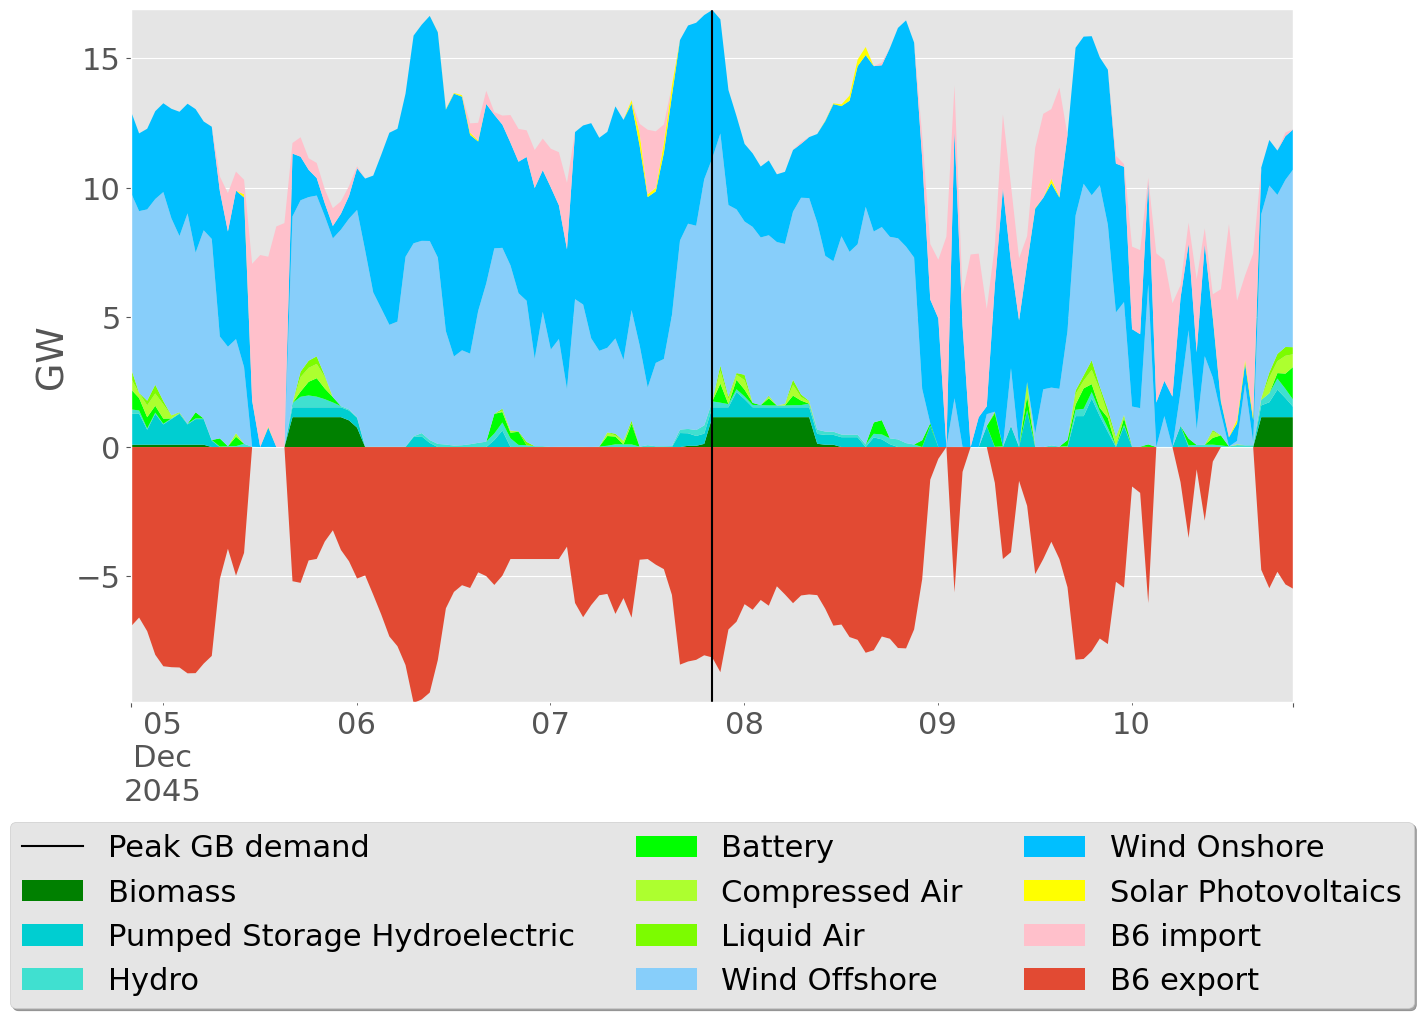

In [19]:
# group biomass stuff
p_by_carrier_scotland['Biomass'] = (
    p_by_carrier_scotland['Biomass (dedicated)'])

# add B6 flows
p_by_carrier_scotland['B6 import'] = B6_import

# rename the hydro bit
p_by_carrier_scotland = p_by_carrier_scotland.rename(
    columns={'Large Hydro': 'Hydro'})
p_by_carrier_scotland = p_by_carrier_scotland.rename(
    columns={'Interconnector': 'Interconnectors Import'})

cols = ["Nuclear", 'Biomass',
        'Waste', "Oil", "Natural Gas",
        'Hydrogen', 'CCS Gas', 'CCS Biomass',
        "Pumped Storage Hydroelectric", 'Hydro',
        'Battery', 'Compressed Air', 'Liquid Air',
        "Wind Offshore", 'Wind Onshore', 'Solar Photovoltaics',
        'Unmet Load', 'B6 import'
        ]

p_by_carrier_scotland = p_by_carrier_scotland[cols]

p_by_carrier_scotland.drop(
    (p_by_carrier_scotland.max()[p_by_carrier_scotland.max() < 50.0]).index,
    axis=1, inplace=True)


colors = {"Coal": "grey",
          "Diesel/Gas oil": "black",
          "Diesel/gas Diesel/Gas oil": "black",
          'Oil': 'black',
          'Unmet Load': 'black',
          'Anaerobic Digestion': 'green',
          'Waste': 'chocolate',
          'Sewage Sludge Digestion': 'green',
          'Landfill Gas': 'green',
          'Biomass (dedicated)': 'green',
          'Biomass (co-firing)': 'green',
          'Biomass': 'green',
          'CCS Biomass': 'darkgreen',
          'Interconnectors Import': 'pink',
          'B6 import': 'pink',
          "Sour gas": "lightcoral",
          "Natural Gas": "lightcoral",
          'CCS Gas': "lightcoral",
          'Hydrogen': "lightcoral",
          "Nuclear": "orange",
          'Shoreline Wave': 'aqua',
          'Tidal Barrage and Tidal Stream': 'aqua',
          'Hydro': "turquoise",
          "Large Hydro": "turquoise",
          "Small Hydro": "turquoise",
          "Pumped Storage Hydroelectric": "darkturquoise",
          'Battery': 'lime',
          'Compressed Air': 'greenyellow',
          'Liquid Air': 'lawngreen',
          "Wind Offshore": "lightskyblue",
          'Wind Onshore': 'deepskyblue',
          'Solar Photovoltaics': 'yellow'}

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(15,10)
(p_by_carrier_scotland / 1e3).plot(
    kind="area", ax=ax, linewidth=0,
    color=[colors[col] for col in p_by_carrier_scotland.columns])

# stacked area plot of negative values, prepend column names with '_' such that they don't appear in the legend
(B6_export / 1e3).plot.area(ax=ax, stacked=True, linewidth=0.)
# rescale the y axis
print(B6_export)
ax.set_ylim(B6_export.min() / 1e3, (p_by_carrier_scotland / 1e3).sum(axis=1).max())

# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
plt.axvline(x = '2045-12-07 20:00:00', color = 'black', label = 'Peak GB demand')
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=3)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
ax.set_ylabel("GW")

ax.set_xlabel("")


## Import and export analysis

In [20]:
# GWh
df_import_export = pd.concat([B6_import, B6_export * -1], axis=1) / 1000
df_import_export.columns = ['B6 Import', 'B6 Export']
df_import_export.sum()
# df_import_export = df_import_export.groupby(df_import_export.index.to_period('M')).sum()
# df_import_export.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# df_import_export.plot(kind="bar", rot=0, figsize=(11.69, 8.27))
# plt.ylabel('TWh')
# plt.xlabel('2021')
# plt.grid(color='grey', linewidth=1, axis='both', alpha=0.5)

B6 Import    174.708106
B6 Export    726.905993
dtype: float64